Causal Attention Output:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615]
 [0.5033923  0.81272499 0.32741841 0.80978756 0.5406981  0.18803745
  0.1284548  0.47788681]
 [0.4298793  0.73511002 0.3958044  0.62937148 0.52886825 0.17006224
  0.17328685 0.47744417]
 [0.44211106 0.74665272 0.33168263 0.60939961 0.55610009 0.13886056
  0.28823244 0.38640678]
 [0.33315831 0.81069711 0.52892214 0.65659098 0.46470037 0.12777581
  0.3853525  0.42761412]
 [0.3152088  0.7388693  0.39578812 0.70430211 0.4501632  0.23102447
  0.35414768 0.43086535]]

Causal Attention Weights:
 [[1.         0.         0.         0.         0.         0.        ]
 [0.43130424 0.56869576 0.         0.         0.         0.        ]
 [0.34707627 0.34101589 0.31190783 0.         0.         0.        ]
 [0.24288074 0.27233688 0.22168545 0.26309693 0.         0.        ]
 [0.2160799  0.17436776 0.15888663 0.17839595 0.27226977 0.        ]
 [0.16967066 0.17680394 0.13775851 0.15166

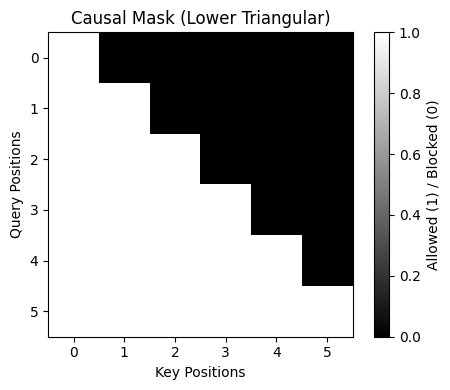

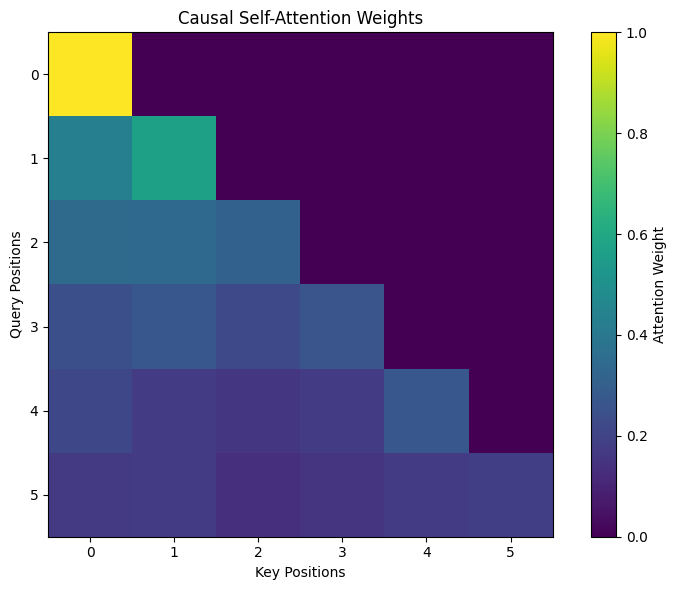

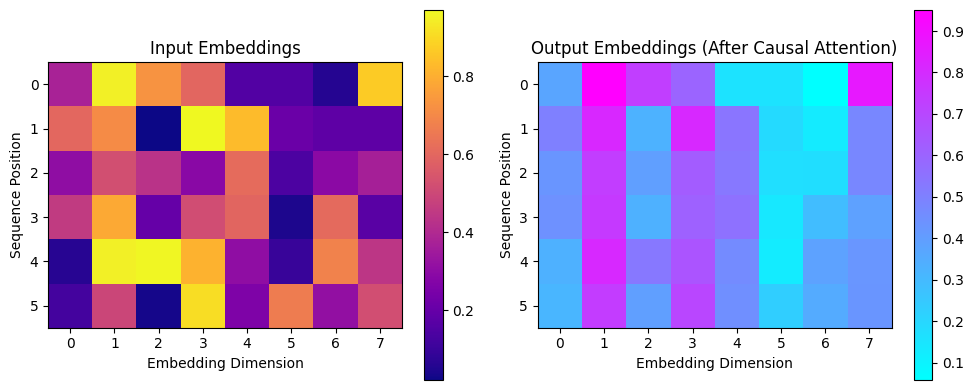

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Utility Functions

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def causal_mask(seq_len):
    return np.tril(np.ones((seq_len, seq_len)))

def scaled_dot_product_attention(Q, K, V, mask=None):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)

    if mask is not None:
        scores = np.where(mask == 0, -1e9, scores) # Block future positions

    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return output, attention_weights

# Example Input
np.random.seed(42)

seq_len = 6
d_model = 8

X = np.random.rand(seq_len, d_model)

# Self-attention: Q = K = V = X
Q = K = V = X

mask = causal_mask(seq_len)

output, attention_weights = scaled_dot_product_attention(Q, K, V, mask=mask)

print("Causal Attention Output:\n", output)
print("\nCausal Attention Weights:\n", attention_weights)

# Visualization
# 1. Mask Matrix
plt.figure(figsize=(5, 4))
plt.imshow(mask, cmap="gray")
plt.title("Causal Mask (Lower Triangular)")
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.colorbar(label="Allowed (1) / Blocked (0)")
plt.tight_layout()
plt.show()

# 2. Attention Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights, cmap="viridis")
plt.title("Causal Self-Attention Weights")
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.colorbar(label="Attention Weight")
plt.tight_layout()
plt.show()

# 3. Input vs Output
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(X, cmap="plasma")
axes[0].set_title("Input Embeddings")
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(output, cmap="cool")
axes[1].set_title("Output Embeddings (After Causal Attention)")
plt.colorbar(im1, ax=axes[1])

for ax in axes:
    ax.set_xlabel("Embedding Dimension")
    ax.set_ylabel("Sequence Position")

plt.tight_layout()
plt.show()